# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Airfoil Self-Noise Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Make an 80/20 train/test split.

In [2]:
target = 'Outcome'
features = list(data.drop(target,axis=1).columns.values)

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=21)

#### Fit a logistic regression model on the training data.

In [32]:
from sklearn import linear_model

lr = linear_model.LogisticRegression()
lr = lr.fit(X_train,y_train)

#### Predict the test data.

In [7]:
y_pred = lr.predict(X_test)

#### Plot the ROC curve and compute the AUC score

AUC: 0.7893617021276594


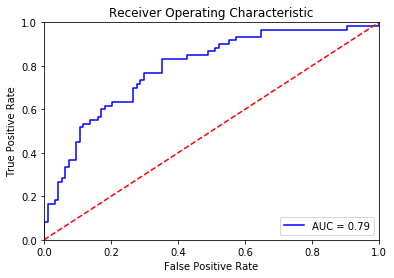

In [12]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = auc(fpr,tpr)


print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Calculate the accuracy metric of the observations in the test set.

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
lr_acc = accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(lr_acc.round(4)))

Accuracy: 0.7403


## Cross-Validation

## *k-*Fold Cross-Validation

In few sentences, explain how K-fold procedure work.

Evaluating any model requires separating data into training and testing sets. Models learn patterns on the training data, and the validity of those patterns are tested using the test data. In simple ML applications, the training and test data sets remain static. However, when using k-fold cross-validation, the splits between these data can change. The data is split into k groups. One group is used as test data while the rest are use for training. In the next iteration, a different fold is used as the test data, and so on to k.

Perform linear regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.

In [35]:
from sklearn.model_selection import cross_val_score

for i in range(2,13):
    scores = cross_val_score(lr,X,y,cv=i)
    print('Score at k={}: {}'.format(i,scores.mean().round(4)))

Score at k=2: 0.7539
Score at k=3: 0.7696
Score at k=4: 0.7682
Score at k=5: 0.7683
Score at k=6: 0.7709
Score at k=7: 0.7722
Score at k=8: 0.7697
Score at k=9: 0.7696
Score at k=10: 0.767
Score at k=11: 0.7658
Score at k=12: 0.7723


## The Bootstrap

Print the target class distribution (You can see that there's almost twice as much 0s than 1s)


In [ ]:
#TODO

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [ ]:
# Separate majority and minority classes
majority_class = #TODO
minority_class = #TODO
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=#TODO,     # sample with replacement
                                 n_samples=#TODO,   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 
# Display new class counts 
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

Let's train another model using Logistic Regression, this time on the balanced dataset

In [ ]:
# Separate input features (X) and target variable (y)
#TODO

#Perform train test split 80/20
#TODO

# Train model
#TODO
 
# Predict on training set
#TODO

# How's our accuracy? Has it improved? Comment
#TODO